In [2]:
import pandas as pd
import sys
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt

# Precinct Shapefile

## VEST's Documentation File

Election results from Illinois State Board of Elections
(https://www.elections.il.gov/electionoperations/votetotalsearch.aspx)

Precinct shapefile from the U.S. Census Bureau's 2020 Redistricting Data Program final release except Tazewell County is from the U.S. Census Bureau's Phase 2 release.

The following modifications were made to match precinct boundaries in use for the 2018 general election.

Clay: Split Clay City 1/2, Harter 1/2, Larkinsburg 1/2, Pixley 1/2
Kankakee: Split Kankakee 4/5, 8/11, Otto 1/3, St. Anne 1/2
Lawrence: Split Bridgeport 4/5, 6/7
Winnebago: Merge Cherry Valley 1/12, 4/9, Harlem 4/19, 16/18; Adjust Rockton 5/11/12/13

- G18GOVDPRI - J.B. Pritzker (Democratic Party)
- G18GOVRRAU - Bruce Rauner (Republican Party)
- G18GOVCMCC - William "Sam" McCann (Conservative Party)
- G18GOVLJAC - Grayson Kash Jackson (Libertarian Party)


- G18ATGDRAO - Kwame Raoul (Democratic Party)
- G18ATGRHAR - Erika Harold (Republican Party)
- G18ATGLHAR - Bubba Harsy (Libertarian Party)


- G18SOSDWHI - Jesse White (Democratic Party)
- G18SOSRHEL - Jason Helland (Republican Party)
- G18SOSLDUT - Steve Dutner (Libertarian Party)


- G18COMDMEN - Susana A. Mendoza (Democratic Party)
- G18COMRSEN - Darlene Senger (Republican Party)
- G18COMLBAL - Claire Ball (Libertarian Party)


- G18TREDFRE - Michael W. Frerichs (Democratic Party)
- G18TRERDOD - Jim Dodge (Republican Party)
- G18TRELLEH - Michael Leheney (Libertarian Party)



## Load VEST's Final File

In [4]:
vest_shp = gp.read_file("./raw-from-source/VEST/il_2018/il_2018.shp")

In [5]:
vest_shp.shape

(10116, 22)

In [6]:
vest_shp.head(1)

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,NAME20,G18GOVDPRI,G18GOVRRAU,G18GOVCMCC,G18GOVLJAC,G18ATGDRAO,...,G18SOSDWHI,G18SOSRHEL,G18SOSLDUT,G18COMDMEN,G18COMRSEN,G18COMLBAL,G18TREDFRE,G18TRERDOD,G18TRELLEH,geometry
0,17,019,CN0100,17019CN0100,Cunningham 1,554,40,4,6,510,...,588,22,6,569,28,8,566,29,12,"POLYGON ((-88.23247 40.13302, -88.23175 40.134..."


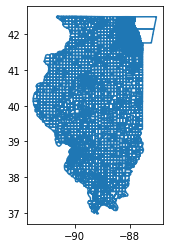

In [7]:
vest_shp.boundary.plot()

# Loading, Combining Election Results

## Load County Fips File

In [8]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Illinois"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

## Governor Results

In [9]:
gov_results = pd.read_csv('./raw-from-source/SOS/54-180-GOVERNOR AND LIEUTENANT GOVERNOR-2018GE.csv')
gov_results.head()

,JurisdictionID,JurisContainerID,JurisName,EISCandidateID,CandidateName,EISContestID,ContestName,PrecinctName,Registration,EISPartyID,PartyName,VoteCount
0,108,48,CITY OF GALESBURG,110,GRAYSON KASH JACKSON,180,GOVERNOR AND LIEUTENANT GOVERNOR,PRECINCT 18,704,19,LIBERTARIAN,7
1,108,48,CITY OF GALESBURG,115,"WILLIAM ""SAM"" McCANN",180,GOVERNOR AND LIEUTENANT GOVERNOR,PRECINCT 18,704,32,CONSERVATIVE,27
2,108,48,CITY OF GALESBURG,105,JB PRITZKER,180,GOVERNOR AND LIEUTENANT GOVERNOR,PRECINCT 18,704,11,DEMOCRATIC,212
3,108,48,CITY OF GALESBURG,100,BRUCE RAUNER,180,GOVERNOR AND LIEUTENANT GOVERNOR,PRECINCT 18,704,12,REPUBLICAN,121
4,108,48,CITY OF GALESBURG,110,GRAYSON KASH JACKSON,180,GOVERNOR AND LIEUTENANT GOVERNOR,PRECINCT 12,804,19,LIBERTARIAN,7


In [10]:
gov_results = gov_results.pivot_table(index = ['JurisdictionID','JurisName','PrecinctName'],
                         columns = ['ContestName','CandidateName'],
                        values = ['VoteCount'],
                         aggfunc = 'sum')
gov_results.reset_index(inplace = True)
gov_results.head()

JurisdictionID JurisName      PrecinctName  \
ContestName                                                
CandidateName                                              
0                          1     ADAMS           BEVERLY   
1                          1     ADAMS            BURTON   
2                          1     ADAMS  CAMP POINT PCT 1   
3                          1     ADAMS  CAMP POINT PCT 2   
4                          1     ADAMS           CLAYTON   

                                     VoteCount                       \
ContestName   GOVERNOR AND LIEUTENANT GOVERNOR                        
CandidateName                     BRUCE RAUNER GRAYSON KASH JACKSON   
0                                        102.0                  4.0   
1                                        309.0                 12.0   
2                                        202.0                  9.0   
3                                        250.0                 15.0   
4                                        210.0                 11.0   

                                                                           
ContestName                                                                
CandidateName JB PRITZKER WILLIAM "SAM" McCANN WRITE-IN Write-In Write-in  
0                    20.0                 21.0      NaN      NaN      NaN  
1                    51.0                 37.0      NaN      NaN      NaN  
2                    42.0                 32.0      NaN      NaN      NaN  
3                    41.0                 38.0      NaN      NaN      NaN  
4                    74.0                 51.0      NaN      NaN      NaN

In [12]:
gov_results.columns = ['JurisdictionID','JurisName','PrecinctName','G18GOVRRAU','G18GOVLJAC','G18GOVDPRI','G18GOVCMCC','wi1','wi2','wi3']
gov_results.drop(columns = ['wi1','wi2','wi3'], inplace = True)

In [13]:
gov_results.head()

,JurisdictionID,JurisName,PrecinctName,G18GOVRRAU,G18GOVLJAC,G18GOVDPRI,G18GOVCMCC
0,1,ADAMS,BEVERLY,102.0,4.0,20.0,21.0
1,1,ADAMS,BURTON,309.0,12.0,51.0,37.0
2,1,ADAMS,CAMP POINT PCT 1,202.0,9.0,42.0,32.0
3,1,ADAMS,CAMP POINT PCT 2,250.0,15.0,41.0,38.0
4,1,ADAMS,CLAYTON,210.0,11.0,74.0,51.0


## Attorney General Results

In [14]:
atg_results = pd.read_csv('./raw-from-source/SOS/54-190-ATTORNEY GENERAL-2018GE.csv')
atg_results = atg_results.pivot_table(index = ['JurisdictionID','JurisName','PrecinctName'],
                         columns = ['ContestName','CandidateName'],
                        values = ['VoteCount'],
                         aggfunc = 'sum')
atg_results.reset_index(inplace = True)
atg_results.head()

JurisdictionID JurisName      PrecinctName        VoteCount  \
ContestName                                              ATTORNEY GENERAL   
CandidateName                                                 BUBBA HARSY   
0                          1     ADAMS           BEVERLY              4.0   
1                          1     ADAMS            BURTON              9.0   
2                          1     ADAMS  CAMP POINT PCT 1              5.0   
3                          1     ADAMS  CAMP POINT PCT 2              8.0   
4                          1     ADAMS           CLAYTON              8.0   

                                        
ContestName                             
CandidateName ERIKA HAROLD KWAME RAOUL  
0                    123.0        21.0  
1                    356.0        42.0  
2                    245.0        37.0  
3                    297.0        34.0  
4                    278.0        58.0

In [15]:
atg_results.columns = ['JurisdictionID','JurisName','PrecinctName','G18ATGLHAR','G18ATGRHAR','G18ATGDRAO']
atg_results.head()

,JurisdictionID,JurisName,PrecinctName,G18ATGLHAR,G18ATGRHAR,G18ATGDRAO
0,1,ADAMS,BEVERLY,4.0,123.0,21.0
1,1,ADAMS,BURTON,9.0,356.0,42.0
2,1,ADAMS,CAMP POINT PCT 1,5.0,245.0,37.0
3,1,ADAMS,CAMP POINT PCT 2,8.0,297.0,34.0
4,1,ADAMS,CLAYTON,8.0,278.0,58.0


## Secretary of State Results

In [16]:
sos_results = pd.read_csv('./raw-from-source/SOS/54-200-SECRETARY OF STATE-2018GE.csv')
sos_results = sos_results.pivot_table(index = ['JurisdictionID','JurisName','PrecinctName'],
                         columns = ['ContestName','CandidateName'],
                        values = ['VoteCount'],
                         aggfunc = 'sum')
sos_results.reset_index(inplace = True)
sos_results.head()

JurisdictionID JurisName      PrecinctName          VoteCount  \
ContestName                                              SECRETARY OF STATE   
CandidateName                                                 JASON HELLAND   
0                          1     ADAMS           BEVERLY              102.0   
1                          1     ADAMS            BURTON              261.0   
2                          1     ADAMS  CAMP POINT PCT 1              182.0   
3                          1     ADAMS  CAMP POINT PCT 2              225.0   
4                          1     ADAMS           CLAYTON              192.0   

                                        
ContestName                             
CandidateName JESSE WHITE STEVE DUTNER  
0                    42.0          3.0  
1                   147.0          1.0  
2                   100.0          6.0  
3                   111.0          7.0  
4                   147.0          9.0

In [17]:
sos_results.columns = ['JurisdictionID','JurisName','PrecinctName','G18SOSRHEL','G18SOSDWHI','G18SOSLDUT']
sos_results.head()

,JurisdictionID,JurisName,PrecinctName,G18SOSRHEL,G18SOSDWHI,G18SOSLDUT
0,1,ADAMS,BEVERLY,102.0,42.0,3.0
1,1,ADAMS,BURTON,261.0,147.0,1.0
2,1,ADAMS,CAMP POINT PCT 1,182.0,100.0,6.0
3,1,ADAMS,CAMP POINT PCT 2,225.0,111.0,7.0
4,1,ADAMS,CLAYTON,192.0,147.0,9.0


## Comptroller Results

In [18]:
com_results = pd.read_csv('./raw-from-source/SOS/54-210-COMPTROLLER-2018GE.csv')
com_results = com_results.pivot_table(index = ['JurisdictionID','JurisName','PrecinctName'],
                         columns = ['ContestName','CandidateName'],
                        values = ['VoteCount'],
                         aggfunc = 'sum')
com_results.reset_index(inplace = True)
com_results.head()

JurisdictionID JurisName      PrecinctName   VoteCount  \
ContestName                                              COMPTROLLER   
CandidateName                                            CLAIRE BALL   
0                          1     ADAMS           BEVERLY         5.0   
1                          1     ADAMS            BURTON         5.0   
2                          1     ADAMS  CAMP POINT PCT 1         9.0   
3                          1     ADAMS  CAMP POINT PCT 2        14.0   
4                          1     ADAMS           CLAYTON        10.0   

                                                         
ContestName                                              
CandidateName DARLENE SENGER SUSANA A. MENDOZA Write-In  
0                      113.0              28.0      NaN  
1                      315.0              86.0      NaN  
2                      215.0              62.0      NaN  
3                      265.0              62.0      NaN  
4                      236.0              99.0      NaN

In [20]:
com_results.columns = ['JurisdictionID','JurisName','PrecinctName','G18COMLBAL','G18COMRSEN','G18COMDMEN','wi1']
com_results.drop(columns=['wi1'],inplace=True)
com_results.head()

,JurisdictionID,JurisName,PrecinctName,G18COMLBAL,G18COMRSEN,G18COMDMEN
0,1,ADAMS,BEVERLY,5.0,113.0,28.0
1,1,ADAMS,BURTON,5.0,315.0,86.0
2,1,ADAMS,CAMP POINT PCT 1,9.0,215.0,62.0
3,1,ADAMS,CAMP POINT PCT 2,14.0,265.0,62.0
4,1,ADAMS,CLAYTON,10.0,236.0,99.0


## Treasurer Results

In [21]:
tre_results = pd.read_csv('./raw-from-source/SOS/54-220-TREASURER-2018GE.csv')
tre_results = tre_results.pivot_table(index = ['JurisdictionID','JurisName','PrecinctName'],
                         columns = ['ContestName','CandidateName'],
                        values = ['VoteCount'],
                         aggfunc = 'sum')
tre_results.reset_index(inplace = True)
tre_results.head()

JurisdictionID JurisName      PrecinctName VoteCount  \
ContestName                                              TREASURER   
CandidateName                                            JIM DODGE   
0                          1     ADAMS           BEVERLY     115.0   
1                          1     ADAMS            BURTON     311.0   
2                          1     ADAMS  CAMP POINT PCT 1     223.0   
3                          1     ADAMS  CAMP POINT PCT 2     268.0   
4                          1     ADAMS           CLAYTON     243.0   

                                                            
ContestName                                                 
CandidateName MICHAEL LEHENEY MICHAEL W. FRERICHS Write-In  
0                         4.0                28.0      NaN  
1                         3.0                88.0      NaN  
2                         9.0                50.0      NaN  
3                        11.0                58.0      NaN  
4                         7.0                92.0      NaN

In [22]:
tre_results.columns = ['JurisdictionID','JurisName','PrecinctName','G18TRERDOD','G18TRELLEH','G18TREDFRE','wi1']
tre_results.drop(columns=['wi1'],inplace=True)
tre_results.head()

,JurisdictionID,JurisName,PrecinctName,G18TRERDOD,G18TRELLEH,G18TREDFRE
0,1,ADAMS,BEVERLY,115.0,4.0,28.0
1,1,ADAMS,BURTON,311.0,3.0,88.0
2,1,ADAMS,CAMP POINT PCT 1,223.0,9.0,50.0
3,1,ADAMS,CAMP POINT PCT 2,268.0,11.0,58.0
4,1,ADAMS,CLAYTON,243.0,7.0,92.0


## Combine Results

In [24]:
election_results = gov_results.merge(atg_results, how = 'outer', on = ['JurisName','PrecinctName'], 
                                     indicator = False).merge(sos_results, how = 'outer', on = ['JurisName','PrecinctName'], 
                                     indicator = False).merge(com_results, how = 'outer', on = ['JurisName','PrecinctName'], 
                                     indicator = False).merge(tre_results, how = 'outer', on = ['JurisName','PrecinctName'], 
                                     indicator = False)

In [25]:
election_results.columns

Index(['JurisdictionID_x', 'JurisName', 'PrecinctName', 'G18GOVRRAU',
       'G18GOVLJAC', 'G18GOVDPRI', 'G18GOVCMCC', 'JurisdictionID_y',
       'G18ATGLHAR', 'G18ATGRHAR', 'G18ATGDRAO', 'JurisdictionID_x',
       'G18SOSRHEL', 'G18SOSDWHI', 'G18SOSLDUT', 'JurisdictionID_y',
       'G18COMLBAL', 'G18COMRSEN', 'G18COMDMEN', 'JurisdictionID',
       'G18TRERDOD', 'G18TRELLEH', 'G18TREDFRE'],
      dtype='object')

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(election_results[['JurisName']].drop_duplicates())

                    JurisName
0                       ADAMS
74                  ALEXANDER
85                       BOND
110                     BOONE
148                     BROWN
162                    BUREAU
212                   CALHOUN
219                   CARROLL
241                      CASS
262                 CHAMPAIGN
380                 CHRISTIAN
410                     CLARK
433                      CLAY
455                   CLINTON
494                     COLES
538                      COOK
2137                 CRAWFORD
2161               CUMBERLAND
2173                   DeKALB
2238                   DeWITT
2261                  DOUGLAS
2278                   DuPAGE
3208                    EDGAR
3239                  EDWARDS
3251                EFFINGHAM
3288                  FAYETTE
3316                     FORD
3338                 FRANKLIN
3373                   FULTON
3430                 GALLATIN
3441                   GREENE
3463                   GRUNDY
3503      

Going to only validate the election result totals for now, and not deal with assigning counties to cities that split counties and distributing county wide votes. 

# Validating Election Results

In [29]:
vest_shp.columns

Index(['STATEFP20', 'COUNTYFP20', 'VTDST20', 'GEOID20', 'NAME20', 'G18GOVDPRI',
       'G18GOVRRAU', 'G18GOVCMCC', 'G18GOVLJAC', 'G18ATGDRAO', 'G18ATGRHAR',
       'G18ATGLHAR', 'G18SOSDWHI', 'G18SOSRHEL', 'G18SOSLDUT', 'G18COMDMEN',
       'G18COMRSEN', 'G18COMLBAL', 'G18TREDFRE', 'G18TRERDOD', 'G18TRELLEH',
       'geometry'],
      dtype='object')

In [30]:
data_columns = ['G18GOVDPRI',
       'G18GOVRRAU', 'G18GOVCMCC', 'G18GOVLJAC', 'G18ATGDRAO', 'G18ATGRHAR',
       'G18ATGLHAR', 'G18SOSDWHI', 'G18SOSRHEL', 'G18SOSLDUT', 'G18COMDMEN',
       'G18COMRSEN', 'G18COMLBAL', 'G18TREDFRE', 'G18TRERDOD', 'G18TRELLEH']

print("Printing differences below")
for race in data_columns:
    if (sum(vest_shp[race])- election_results[race].sum() != 0):
        print(race+" has a difference of "+str(sum(vest_shp[race])-election_results[race].sum())+" votes")
        print("\tVEST: "+str(sum(vest_shp[race]))+" votes")
        print("\tSOURCES: "+str(election_results[race].sum())+" votes")
    else:
        print(race + " is equal", "\tVEST: " + str(sum(vest_shp[race])), "\tRDH: " + str(election_results[race].sum()))
print("")
print("All other races are equal")


Printing differences below
G18GOVDPRI is equal 	VEST: 2479746 	RDH: 2479746.0
G18GOVRRAU is equal 	VEST: 1765751 	RDH: 1765751.0
G18GOVCMCC is equal 	VEST: 192527 	RDH: 192527.0
G18GOVLJAC is equal 	VEST: 109518 	RDH: 109518.0
G18ATGDRAO is equal 	VEST: 2488326 	RDH: 2488326.0
G18ATGRHAR is equal 	VEST: 1944142 	RDH: 1944142.0
G18ATGLHAR is equal 	VEST: 115941 	RDH: 115941.0
G18SOSDWHI is equal 	VEST: 3120207 	RDH: 3120207.0
G18SOSRHEL is equal 	VEST: 1336079 	RDH: 1336079.0
G18SOSLDUT is equal 	VEST: 114556 	RDH: 114556.0
G18COMDMEN is equal 	VEST: 2716853 	RDH: 2716853.0
G18COMRSEN is equal 	VEST: 1678346 	RDH: 1678346.0
G18COMLBAL is equal 	VEST: 140543 	RDH: 140543.0
G18TREDFRE is equal 	VEST: 2593816 	RDH: 2593816.0
G18TRERDOD is equal 	VEST: 1750897 	RDH: 1750897.0
G18TRELLEH is equal 	VEST: 155256 	RDH: 155256.0

All other races are equal
